In [3]:
import pandas as pd
import numpy as np

In [4]:
#reading our dataset
df = pd.read_csv(r'./cleaned-data.csv')

In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


In [1]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingClassifier

In [6]:
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression(solver='liblinear', multi_class='auto')
svm_model = SVC()
gradient_boosting = GradientBoostingClassifier()

In [7]:
algorithms = [('random_forest', RandomForestClassifier(random_state=0)),
              ('logistic_regression', LogisticRegression(solver='liblinear', multi_class='auto')),
              ('SVM', SVC()),
              ('gradient_boosting', GradientBoostingClassifier(random_state=0))]

In [8]:
# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('logistic_regression', logistic_regression),
        ('SVM', svm_model),
        ('gradient_boosting', gradient_boosting)
    ]
)

In [9]:
model_params = { 
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'SVM':{
        'model': svm.SVC(),
        'params':{
            'svc__C': [0.1, 1, 10],
            'svc__kernel': ['linear', 'rbf', 'poly'],
            'svc__degree': [2, 3, 4]
        } 
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'gradientboostingclassifier__n_estimators': [50, 100, 200],
            'gradientboostingclassifier__learning_rate': [0.1, 0.5, 1.0],
            'gradientboostingclassifier__max_depth': [3, 5, 7]
        }
    },
    'voting_classifier': {
        'model': voting_clf,
        'params': {
            'votingclassifier__voting': ['hard', 'soft'],  # Specify the voting method
            'votingclassifier__weights': [None, [0.5, 0.5], [0.2, 0.3, 0.5]]  # Specify the weights for soft voting
        }
    }
}

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# Loop over the algorithms
for name, model in algorithms:
    # Create a pipeline with a scaler and the current model
    pipe = Pipeline([('scaler', StandardScaler()), (name, model)])
    
    # Fit the pipeline on the training data
    pipe.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipe.predict(X_test)
    sc = pipe.score(X_test, y_test)
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Algorithm: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Score: {sc:.4f}")
    print('---Classification Report---')
    print(classification_report(y_test, pipe.predict(X_test)))
    print("---------------------------------------")


Algorithm: random_forest
Mean Squared Error: 0.22
R-squared: -0.1311
Score: 0.7808
---Classification Report---
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1298
           1       0.60      0.50      0.54       463

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

---------------------------------------
Algorithm: logistic_regression
Mean Squared Error: 0.21
R-squared: -0.0666
Score: 0.7933
---Classification Report---
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.53      0.58       463

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761

---------------------------------------
Algorithm: SVM
Mean Squared Error: 0.2

In [12]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])

c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\pipeline.py", line 711, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "c:\Users\Hasnian\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return acc

In [13]:
df2

,model,best_score,best_params
0,random_forest,0.780381,{'randomforestclassifier__n_estimators': 10}
1,logistic_regression,0.800075,{'logisticregression__C': 5}
2,SVM,0.795341,"{'svc__C': 1, 'svc__degree': 2, 'svc__kernel':..."
3,gradient_boosting,0.806322,{'gradientboostingclassifier__learning_rate': ...
4,voting_classifier,0.803482,"{'votingclassifier__voting': 'hard', 'votingcl..."


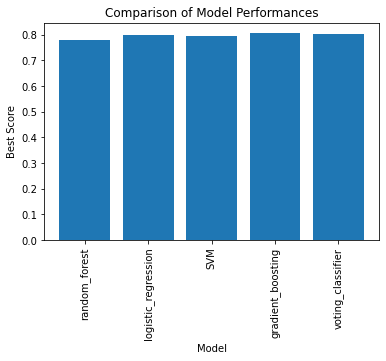

In [14]:
import matplotlib.pyplot as plt

# Extract the best_score column into a separate array
scores = df2['best_score'].values

# Plot the scores as a bar plot
plt.bar(df2['model'], scores)

# Add labels and title to the plot
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Comparison of Model Performances')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Comparison of Model Performances')

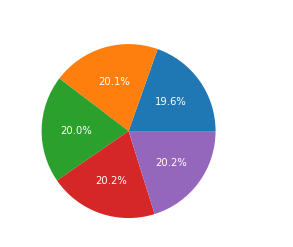

In [15]:
scores = df2['best_score'].values

plt.pie(scores, labels=df2['model'], autopct='%1.1f%%', textprops={'color': 'white'})

plt.title('Comparison of Model Performances', color='white')


Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('random_forest', best_estimators['random_forest']),
    ('logistic_regression', best_estimators['logistic_regression']),
    ('SVM', best_estimators['SVM']),
    ('gradient_boosting', best_estimators['gradient_boosting'])
]

In [28]:
# Train and evaluate the Voting Classifier
voting_train_scores = []
voting_val_scores = []
for i in range(epoch):
    voting_clf.fit(X_train, y_train)
    voting_train_score = voting_clf.score(X_train, y_train)
    voting_val_score = voting_clf.score(X_test, y_test)
    voting_train_scores.append(voting_train_score)
    voting_val_scores.append(voting_val_score)
    print(f"Voting Classifier - Epoch {i+1} - Train score: {voting_train_score:.4f} - Validation score: {voting_val_score:.4f}")
results.append((voting_train_scores, voting_val_scores))
names.append('Voting Classifier')

Voting Classifier - Epoch 1 - Train score: 0.8387 - Validation score: 0.7893
Voting Classifier - Epoch 2 - Train score: 0.8389 - Validation score: 0.7893
Voting Classifier - Epoch 3 - Train score: 0.8389 - Validation score: 0.7899
Voting Classifier - Epoch 4 - Train score: 0.8387 - Validation score: 0.7893
Voting Classifier - Epoch 5 - Train score: 0.8383 - Validation score: 0.7882
Voting Classifier - Epoch 6 - Train score: 0.8393 - Validation score: 0.7910
Voting Classifier - Epoch 7 - Train score: 0.8387 - Validation score: 0.7927
Voting Classifier - Epoch 8 - Train score: 0.8393 - Validation score: 0.7927
Voting Classifier - Epoch 9 - Train score: 0.8393 - Validation score: 0.7871
Voting Classifier - Epoch 10 - Train score: 0.8389 - Validation score: 0.7836


In [20]:
voting_clf.score(X,y)

0.827346301292063

In [21]:
best_clf = voting_clf

Confusion Matrix

[[1196  102]
 [ 265  198]]


Text(105.0, 0.5, 'Truth')

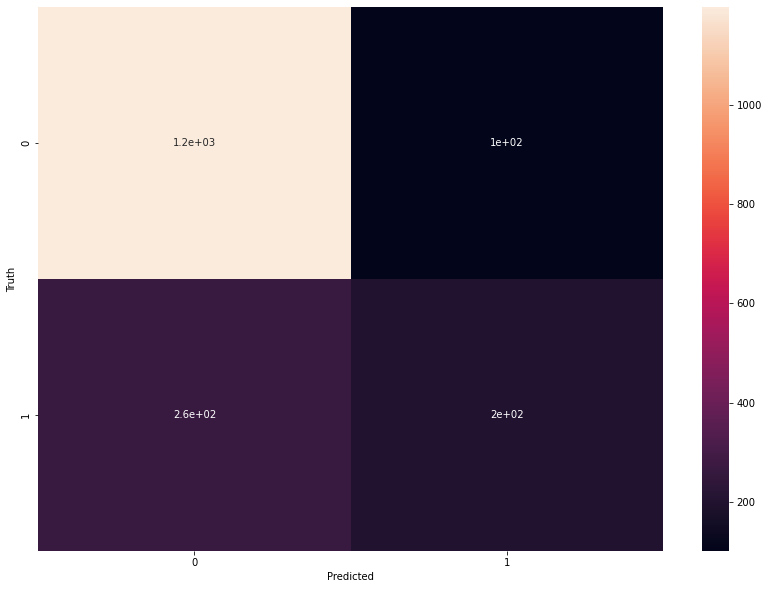

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, best_clf.predict(X_test))
print(cm)

plt.figure(figsize = (14,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

-------
TESTING ON UNSEEN DATA
-------

In [27]:
y_pred[35]

1